# Explore IMDB Dataset

In [ ]:
# ! conda install -c conda-forge beautifulsoup4 -y

In [ ]:
# ! conda install -c conda-forge matplotlib -y

In [51]:
from bs4 import BeautifulSoup

import requests
import sys
import random

In [13]:
# we webscrape in case the underlying data source urls change (even though it is referring to the same data)
main_data_source_url = "https://datasets.imdbws.com/"
results = requests.get(main_data_source_url)
doc = BeautifulSoup(results.text, "html.parser")
urls_dict = {elem.text: elem.a["href"] for elem in doc.find_all("ul")}


In [19]:
urls_dict.keys()

dict_keys(['name.basics.tsv.gz', 'title.akas.tsv.gz', 'title.basics.tsv.gz', 'title.crew.tsv.gz', 'title.episode.tsv.gz', 'title.principals.tsv.gz', 'title.ratings.tsv.gz'])

In [22]:
# we manually specify file names and file formats just in case \
# the main data source page changes either the file names or formats
files_to_read = ['name.basics.tsv.gz', 
'title.akas.tsv.gz', 
'title.basics.tsv.gz', 
'title.crew.tsv.gz', 
'title.episode.tsv.gz', 
'title.principals.tsv.gz', 
'title.ratings.tsv.gz'
]

In [30]:
print(set(files_to_read) - set(urls_dict.keys()))

set()


In [24]:
estimated_data_size_dict = dict()

for file_ in files_to_read:
    response = requests.head(urls_dict[file_], allow_redirects=True)

    size = response.headers.get('content-length', -1)

    # size in megabytes (Python 2, 3)
    size_readable = round(int(size) / float(1 << 20), 2)
    estimated_data_size_dict[file_] = size_readable


In [39]:
for file_size_elem in sorted(estimated_data_size_dict.items(), key=lambda x:x[1], reverse = True):
    print(f"{file_size_elem[0]} {file_size_elem[1]} MB")

title.principals.tsv.gz 412.59 MB
title.akas.tsv.gz 286.63 MB
name.basics.tsv.gz 231.87 MB
title.basics.tsv.gz 162.07 MB
title.crew.tsv.gz 62.13 MB
title.episode.tsv.gz 38.42 MB
title.ratings.tsv.gz 6.2 MB


# Title Principals

Contains the principal cast/crew for titles (this is why this is the largest dataset)

In [68]:
principals_df = pd.read_csv("data/title.principals.tsv.gz", sep='\t', compression='gzip', header=0, 
        skiprows=lambda i: i>0 and random.random() > 0.01)
    

In [69]:
principals_df.shape

(553366, 6)

In [70]:
principals_df.groupby(by="tconst")["tconst"].count()

tconst
tt0000034    1
tt0000245    1
tt0000302    1
tt0000442    1
tt0000490    1
            ..
tt9916788    1
tt9916814    1
tt9916822    1
tt9916832    1
tt9916850    1
Name: tconst, Length: 533837, dtype: int64

In [71]:
principals_df.category.value_counts()

actor                  121591
self                    95824
actress                 94620
writer                  77434
director                64380
producer                35766
cinematographer         19205
composer                18843
editor                  18445
production_designer      3620
archive_footage          3599
archive_sound              39
Name: category, dtype: int64

In [57]:
principals_df.sample(25)

,tconst,ordering,nconst,category,job,characters
438844,tt5634684,1,nm3727149,actress,\N,"[""Lee Young-ae""]"
288950,tt18967056,2,nm13508191,writer,\N,\N
144871,tt1210456,5,nm0882089,self,\N,"[""Self - Contestant""]"
127801,tt11571136,5,nm11138478,producer,producer,\N
445249,tt5895468,2,nm6844693,self,\N,"[""Self - Panelist""]"
350795,tt24322492,5,nm0093505,director,\N,\N
107974,tt10990680,2,nm4048321,actor,\N,"[""Grapefruit""]"
33091,tt0464409,7,nm1864983,self,\N,"[""Self""]"
506271,tt8298550,6,nm2164306,director,\N,\N
323717,tt21837522,2,nm9653000,actress,\N,\N


In [65]:
principals_df.query("tconst == 'tt5634684'")

,tconst,ordering,nconst,category,job,characters
438844,tt5634684,1,nm3727149,actress,\N,"[""Lee Young-ae""]"


# Title AKAS
Contains information about titles:


# Name Basics
contains information about people

In [1]:
import pandas as pd

url = 'https://datasets.imdbws.com/name.basics.tsv.gz'
name_df = pd.read_csv(url, compression='gzip', sep='\t', header=0)


# Title Basics


In [41]:
name_df.shape

(12410617, 6)

# Title Crew

Contains the director and writer information for all the titles in IMDb

In [40]:
name_df.describe()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
count,12410617,12410614,12410617,12410617,9710846,12410617
unique,12410617,9630938,524,465,21244,5135934
top,nm0000001,Alex,\N,\N,actor,\N
freq,1,400,11836255,12197425,2197053,2162191


In [42]:
name_df.sample(10)

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
8828423,nm5461678,Simon Vierma,\N,\N,miscellaneous,tt2617592
12274101,nm9834569,Jared Rayo,\N,\N,actor,tt8325484
5895574,nm2129364,Brian Moore,\N,\N,actor,"tt0498105,tt2364693"
1462283,nm10580669,Harry van der Zee,\N,\N,NaN,tt10097954
5035989,nm14397026,Mahendra Prasad,\N,\N,actor,tt25151254
11082940,nm8367641,Karoline Bentsen,\N,\N,actress,"tt0971172,tt6003320"
6080459,nm2341740,Shandie Wattley,\N,\N,actress,"tt0839787,tt0433451"
12143627,nm9680440,Bennett Caldwell,\N,\N,cinematographer,"tt8107224,tt22307186"
2090857,nm11235274,Larissa Cavalcante,\N,\N,"producer,actress,cinematographer","tt11519570,tt22055300"
1100538,nm10191896,Julio Morales,\N,\N,actor,\N


<Axes: >

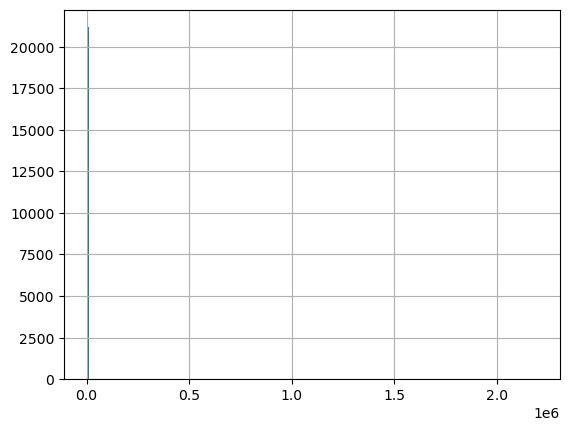

In [49]:
name_df.primaryProfession.value_counts().hist(bins=200)

# Title Episode
Contains the tv episode information.

# Title Ratings
Contains the IMDb rating and votes information for titles

# Possible Target Plots

Incorporate ratings and crew information:

- 1 graph that shows the distribution of some categorical data 
    - distribution of ratings by genre
- 1 graph that shows the distribution of the data across a temporal line
    - distribution of 